In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from pyhalofit import pyhalofit
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt

using dark_emulator at  /Users/sugiyamasunao/Documents/python_package/dark_emulator_public/dark_emulator/__init__.py


## power spectrum class

In [3]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


In [4]:
%%time
power_b1.init_pklin(3.0)

CPU times: user 118 ms, sys: 6 ms, total: 124 ms
Wall time: 31.6 ms


In [5]:
%%time
power_b1.init_pkhalo()

CPU times: user 488 ms, sys: 9.59 ms, total: 498 ms
Wall time: 375 ms


In [6]:
%%time
k = np.logspace(-5.0, 3, 100)
pkhalo = power_b1.get_pkhalo_kz(k, 0.1)
pklin  = power_b1.get_pklin_kz(k, 0.1)

CPU times: user 3.94 ms, sys: 790 µs, total: 4.73 ms
Wall time: 4.02 ms


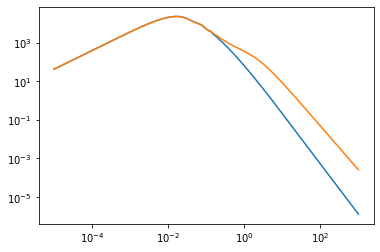

In [7]:
plt.figure()
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1e2,1e6)
plt.plot(k, pklin)
plt.plot(k, pkhalo)
plt.show()

$P\left(\frac{l}{\chi}, z(\chi)\right)$

In [8]:
l = 2e3
chimin, chimax = power_b1.z2chi(1e-4), power_b1.z2chi(3)
chi = np.logspace(np.log10(chimin), np.log10(chimax), 50)

In [9]:
%%time
pklin_lz = power_b1.get_pklin_lchi(l, chi)

CPU times: user 9.22 ms, sys: 938 µs, total: 10.2 ms
Wall time: 9.37 ms


In [10]:
%%time
pkhalo_lz = power_b1.get_pkhalo_lchi(l, chi)

CPU times: user 15.7 ms, sys: 1.84 ms, total: 17.5 ms
Wall time: 15.8 ms


In [11]:
%%time
pkhalogm_lz = power_b1.get_pkhalogm_lchi(l, chi, 4.0)

CPU times: user 20.1 ms, sys: 2.57 ms, total: 22.7 ms
Wall time: 20.6 ms


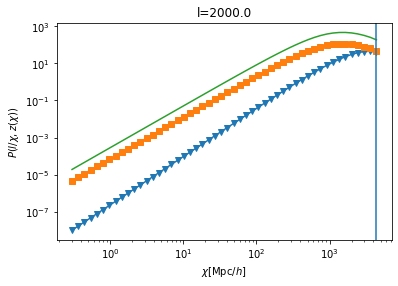

In [12]:
plt.figure()
plt.xlabel(r'$\chi[{\rm Mpc}/h]$')
plt.ylabel(r'$P\left(l/\chi, z(\chi)\right)$')
plt.title(f'l={l}')
plt.loglog(chi, pklin_lz, marker='v')
plt.loglog(chi, pkhalo_lz, marker='s')
plt.loglog(chi, pkhalogm_lz)#, marker='o')
plt.axvline(power_b1.chi_max)
plt.show()

## galaxy sample classes

In [14]:
g_l1 = hsc3x2pt.galaxy_sample_lens_class(['lowz'  , 0.251, 0.15, 0.35, 1.78, 476995717.8450799, 2.259])
g_l2 = hsc3x2pt.galaxy_sample_lens_class(['cmass1', 0.484, 0.47, 0.55, 2.10, 237073991.1080770, 3.563])
g_l3 = hsc3x2pt.galaxy_sample_lens_class(['cmass2', 0.617, 0.55, 0.70, 2.28, 355966953.6157313, 3.729])

g_s1 = hsc3x2pt.galaxy_sample_source_class(['s1' , 1.0, 0.2, 103290218.99676953])
g_s2 = hsc3x2pt.galaxy_sample_source_class(['s2' , 1.4, 0.2, 103290218.99676953])
g_s12= hsc3x2pt.galaxy_sample_source_class(['s12', 1.2, 0.2, 103290218.99676953])

In [15]:
cosmo_dict = power_b1.get_cosmo_dict()
g_l1.set_cosmology_from_dict(cosmo_dict)
g_s1.set_cosmology_from_dict(cosmo_dict)

chirange1 = g_l1.window_galaxy_chirange()
chirange2 = g_s1.window_lensing_chirange()

print(chirange1, chirange2)

[433.352739  959.1119277] [  22.91656451 2268.73988659]


In [16]:
g_l1.z_lens_eff

array(0.23598266)

In [17]:
hsc3x2pt.get_chirange_overlap(chirange1, chirange2)

array([433.352739 , 959.1119277])

In [18]:
g_s1.sample_type

'source'

## $C(l)$ class

In [32]:
pk2cl = hsc3x2pt.pk2cl_class(power_b1)

In [33]:
pk2cl.set_cosmology_from_dict(cosmo_dict)
pk2cl.set_galaxy_sample(g_l1)
pk2cl.set_galaxy_sample(g_l2)
pk2cl.set_galaxy_sample(g_l3)
pk2cl.set_galaxy_sample(g_s12)
pk2cl.init_pk()

### $C(l)$ per single l

CPU times: user 58.7 ms, sys: 2.21 ms, total: 60.9 ms
Wall time: 59.6 ms


2.0370936673161525e-07

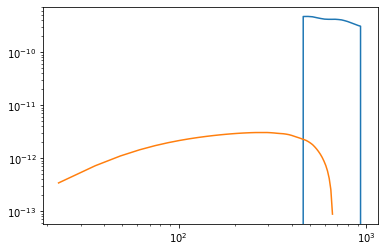

In [34]:
%%time
pk2cl._CgE(g_l1, g_s1, 100, model='nonlin', plot=True, plot_xlog=True)

CPU times: user 67.6 ms, sys: 3.69 ms, total: 71.3 ms
Wall time: 68.1 ms


2.7714389166749323e-09

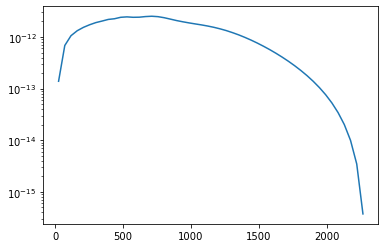

In [35]:
%%time
pk2cl._CEE(g_s1, g_s1, 100.0, model='nonlin', plot=True)

Cgg(l)                                =3.479320023249912e-05
Cgg(l)+Cg,mag(l)                      =3.4851290551281055e-05
Cgg(l)+Cg,mag(l)+Cmag,g(l)            =3.4909380870062994e-05
Cgg(l)+Cg,mag(l)+Cmag,g(l)+Cmag,mag(l)=3.491144708760743e-05
CPU times: user 75.6 ms, sys: 2.76 ms, total: 78.3 ms
Wall time: 76.7 ms


3.491144708760743e-05

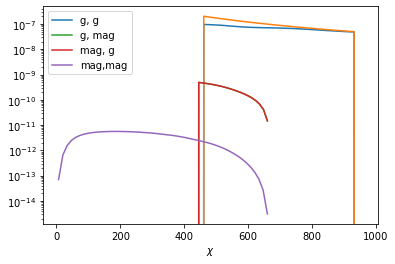

In [36]:
%%time
pk2cl._Cgg(g_l1, g_l1, 100.0, model='nonlin', plot=True)

### $C(l)$ as a function of $l$

lin:2.1610090732574463 sec
nonlin:4.518519878387451 sec


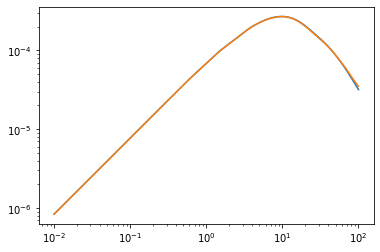

CPU times: user 7.06 s, sys: 144 ms, total: 7.21 s
Wall time: 7.42 s


In [38]:
%%time
l = np.logspace(-2, 2.0, 100)

plt.figure()
with hsc3x2pt.Time(message='lin'):
    clgg = pk2cl.Cgg('lowz', 'lowz', l, model='lin')
plt.loglog(l, clgg)
with hsc3x2pt.Time(message='nonlin'):
    clgg = pk2cl.Cgg('lowz', 'lowz', l, model='nonlin', plot=False)
plt.loglog(l, clgg)
plt.show()

lin:1.0787792205810547 sec
lin:2.1763529777526855 sec


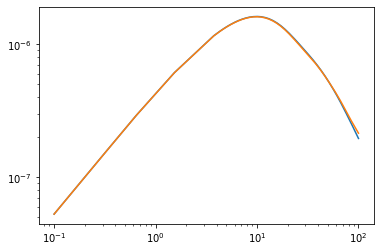

CPU times: user 4.14 s, sys: 71 ms, total: 4.21 s
Wall time: 4.26 s


In [39]:
%%time
l = np.logspace(-1, 2, 1000)

plt.figure()
with hsc3x2pt.Time(message='lin'):
    clgE = pk2cl.CgE('lowz', 's12', l, model='lin')
plt.loglog(l, clgE)
with hsc3x2pt.Time(message='lin'):
    clgE = pk2cl.CgE('lowz', 's12', l, model='nonlin')
plt.loglog(l, clgE)
plt.show()

lin:0.4843411445617676 sec
lin:1.3079371452331543 sec


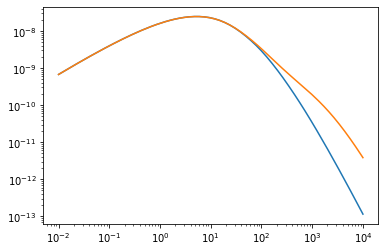

CPU times: user 2.95 s, sys: 58.8 ms, total: 3.01 s
Wall time: 3.05 s


In [41]:
%%time
l = np.logspace(-2, 4, 1000)

plt.figure()
t0 = time.time()
with hsc3x2pt.Time(message='lin'):
    clEE = pk2cl.CEE('s12', 's12', l, model='lin')
plt.loglog(l, clEE)
with hsc3x2pt.Time(message='lin'):
    clEE = pk2cl.CEE('s12', 's12', l, model='nonlin')
plt.loglog(l, clEE)
plt.show()

### compute all the $C(l)$

In [42]:
%%time
pk2cl.compute_all_Cl(l)

/Users/sugiyamasunao/Documents/study/weaklensHSCY3Fisher/hsc3x2pt.py:271: RuntimeWarning: divide by zero encountered in true_divide
  k, z = l/chi, self.chi2z(chi)
/Users/sugiyamasunao/Documents/study/weaklensHSCY3Fisher/hsc3x2pt.py:545: RuntimeWarning: invalid value encountered in true_divide
  ans += simps(w1*w2*plchi/chi**2, chi)
/Users/sugiyamasunao/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
/Users/sugiyamasunao/Documents/study/weaklensHSCY3Fisher/hsc3x2pt.py:568: RuntimeWarning: invalid value encountered in true_divide
  ans += simps(w1*w2*plchi/chi**2, chi) * 2*(alpha_mag1-1)
/Users/sugiyamasunao/Documents/study/weaklensHSCY3Fisher/hsc3x2pt.py:559: RuntimeWarning: invalid value encountered in true_divide
  ans += simps(w1*w2*plchi/chi**2, chi) * 2*(alpha_mag2-1)


CPU times: user 37.8 s, sys: 484 ms, total: 38.3 s
Wall time: 38.5 s


In [43]:
pk2cl.dump_Cl_cache('test_cl', overwrite=True)

saving l to test_cl/l.txt
saving lowz,lowz to test_cl/lowz,lowz.txt
saving lowz,cmass1 to test_cl/lowz,cmass1.txt
saving lowz,cmass2 to test_cl/lowz,cmass2.txt
saving cmass1,lowz to test_cl/cmass1,lowz.txt
saving cmass1,cmass1 to test_cl/cmass1,cmass1.txt
saving cmass1,cmass2 to test_cl/cmass1,cmass2.txt
saving cmass2,lowz to test_cl/cmass2,lowz.txt
saving cmass2,cmass1 to test_cl/cmass2,cmass1.txt
saving cmass2,cmass2 to test_cl/cmass2,cmass2.txt
saving lowz,s12 to test_cl/lowz,s12.txt
saving cmass1,s12 to test_cl/cmass1,s12.txt
saving cmass2,s12 to test_cl/cmass2,s12.txt
saving s12,s12 to test_cl/s12,s12.txt


In [44]:
#pk2cl.load_Cl_cache('test_cl')

### Fourier-back transformation of signals

These functions need validation with brute-force method.

using dark_emulator at  /Users/sugiyamasunao/Documents/python_package/dark_emulator_public/dark_emulator/__init__.py
brute force:0.05620098114013672 sec
-5.536273882792816 0.5637261172071844


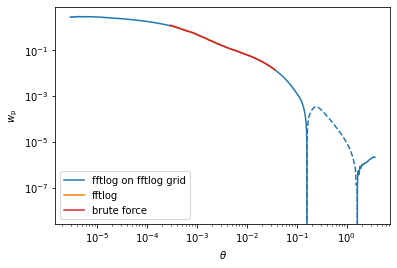

fftlog:0.6591601371765137 sec


In [95]:
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
with hsc3x2pt.Time(message='brute force'):
    ans = pk2cl.angular_correlation_function_bruteforce('lowz', 'lowz', t, 'wp')
with hsc3x2pt.Time(message='fftlog'):
    ans = pk2cl.angular_correlation_function_fftlog('lowz', 'lowz', t, 'wp', plot=True, 
                                                    plot_with=[{'xy':[t,ans],'c':'C3','label':'brute force'}])

brute force:0.06697487831115723 sec
-5.536273882792816 0.5637261172071844


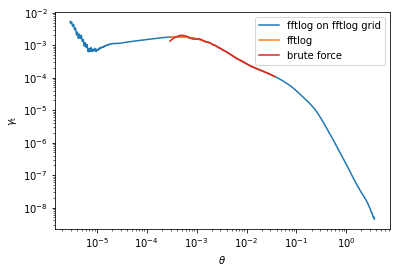

fftlog:1.7703728675842285 sec


In [96]:
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
with hsc3x2pt.Time(message='brute force'):
    ans = pk2cl.angular_correlation_function_bruteforce('lowz', 's12', t, 'gamma_t')
with hsc3x2pt.Time(message='fftlog'):
    ans = pk2cl.angular_correlation_function_fftlog('lowz', 's12', t, 'gamma_t', plot=True, 
                                                    plot_with=[{'xy':[t,ans],'c':'C3','label':'brute force'}])

brute force:0.07211995124816895 sec
-5.536273882792816 0.5637261172071844


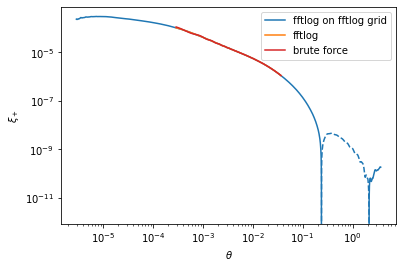

fftlog:1.0944850444793701 sec


In [97]:
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
with hsc3x2pt.Time(message='brute force'):
    ans = pk2cl.angular_correlation_function_bruteforce('s12', 's12', t, 'xi+')
with hsc3x2pt.Time(message='fftlog'):
    ans = pk2cl.angular_correlation_function_fftlog('s12', 's12', t, 'xi+', plot=True, 
                                                    plot_with=[{'xy':[t,ans],'c':'C3','label':'brute force'}])

brute force:0.09841799736022949 sec
-5.536273882792816 0.5637261172071844


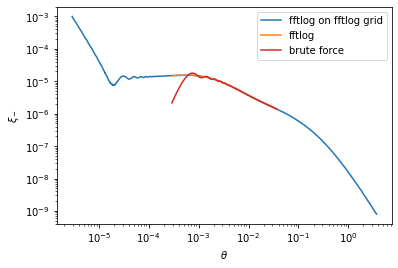

fftlog:1.1218922138214111 sec


In [98]:
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
with hsc3x2pt.Time(message='brute force'):
    ans = pk2cl.angular_correlation_function_bruteforce('s12', 's12', t, 'xi-')
with hsc3x2pt.Time(message='fftlog'):
    ans = pk2cl.angular_correlation_function_fftlog('s12', 's12', t, 'xi-', plot=True, 
                                                    plot_with=[{'xy':[t,ans],'c':'C3','label':'brute force'}])

### covariance matrices

1000 1000
(1000, 1000)
1000 1000
0.04884271409381313 0.04884271409381313


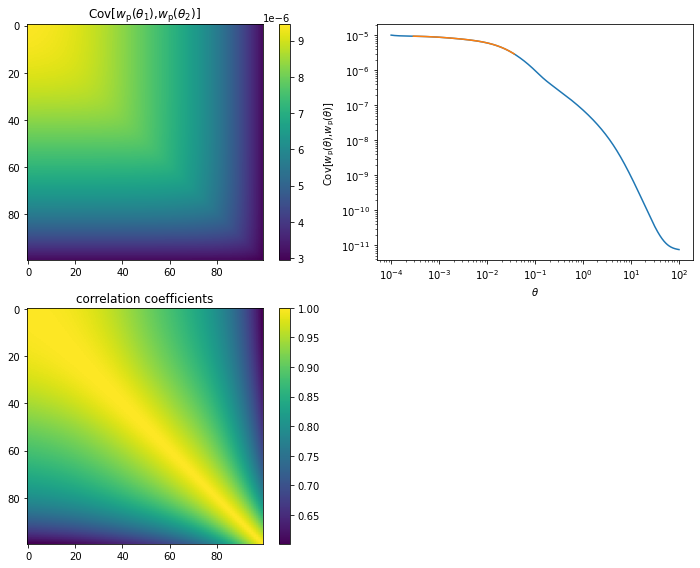

CPU times: user 3.38 s, sys: 224 ms, total: 3.61 s
Wall time: 2.28 s


In [99]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_fftlog(['lowz','lowz'], 'wp', t, ['lowz','lowz'], 'wp', t, binave=True, plot=True)

1000 1000
(1000, 1000)
1000 1000
0.04884271409381313 0.04884271409381313


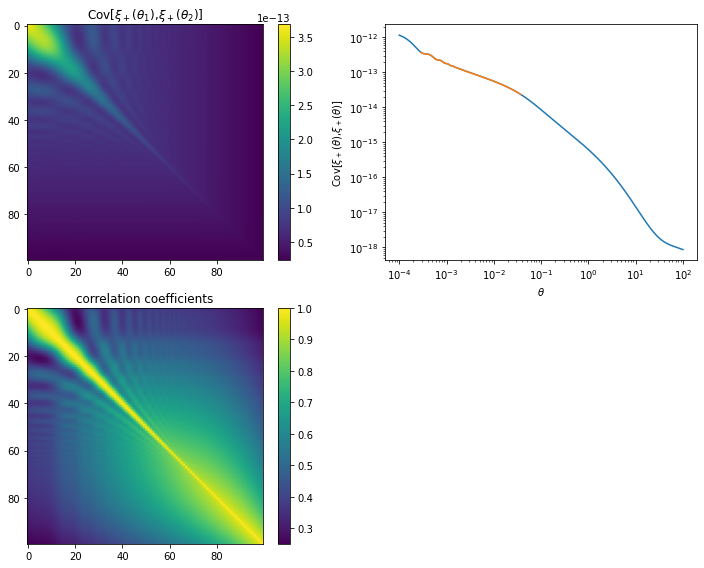

CPU times: user 3.62 s, sys: 215 ms, total: 3.83 s
Wall time: 2.56 s


In [100]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_fftlog(['s12','s12'], 'xi+', t, ['s12', 's12'], 'xi+', t, binave=True, plot=True)

1000 1000
(1000, 1000)
1000 1000
0.04884271409381313 0.04884271409381313


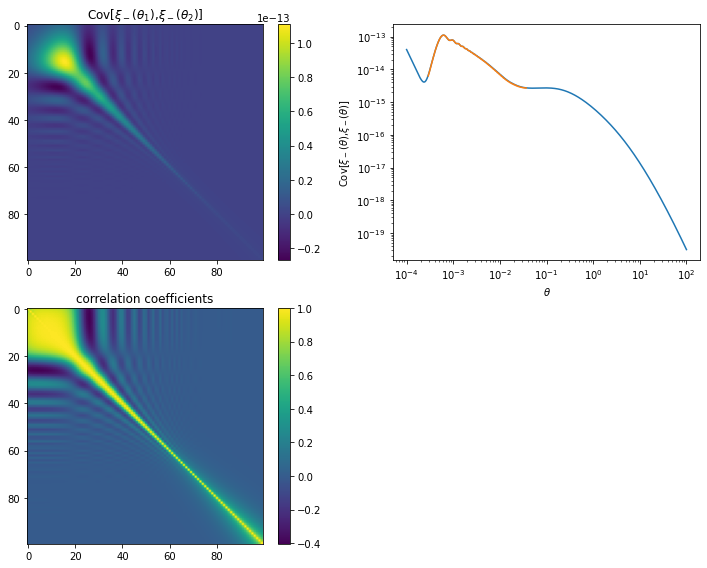

CPU times: user 3.89 s, sys: 209 ms, total: 4.1 s
Wall time: 2.83 s


In [101]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_fftlog(['s12','s12'], 'xi-', t, ['s12', 's12'], 'xi-', t, binave=True, plot=True)

1000 1000
(1000, 1000)
1000 1000
0.04884271409381313 0.04884271409381313


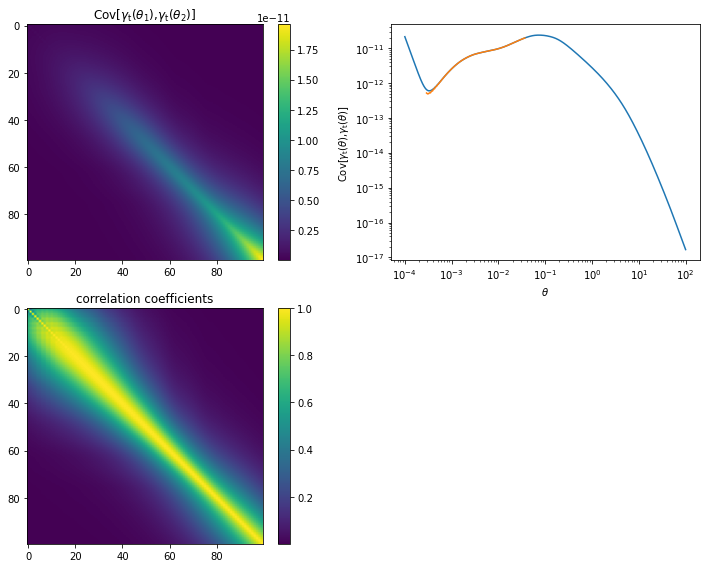

CPU times: user 3.73 s, sys: 193 ms, total: 3.92 s
Wall time: 2.68 s


In [102]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_fftlog(['lowz','s12'], 'gamma_t', t, ['lowz','s12'], 'gamma_t', t, binave=True, plot=True)

## brute force

0.04884271409381313 0.04884271409381313


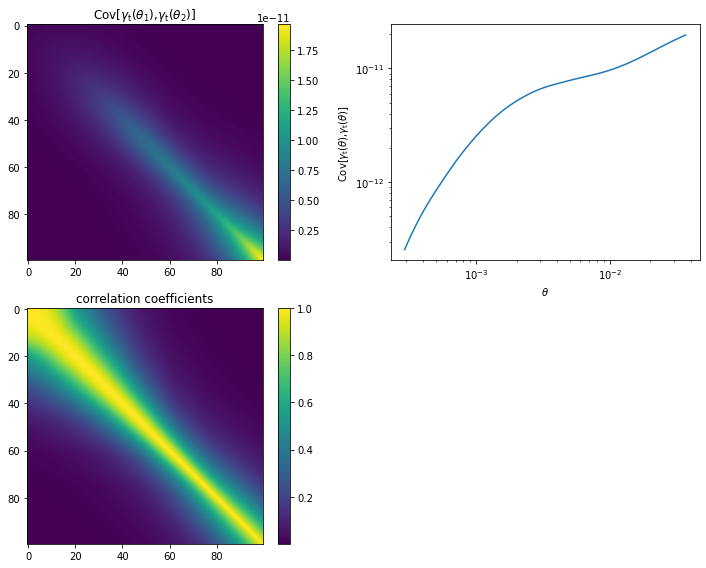

0.04884271409381313 0.04884271409381313


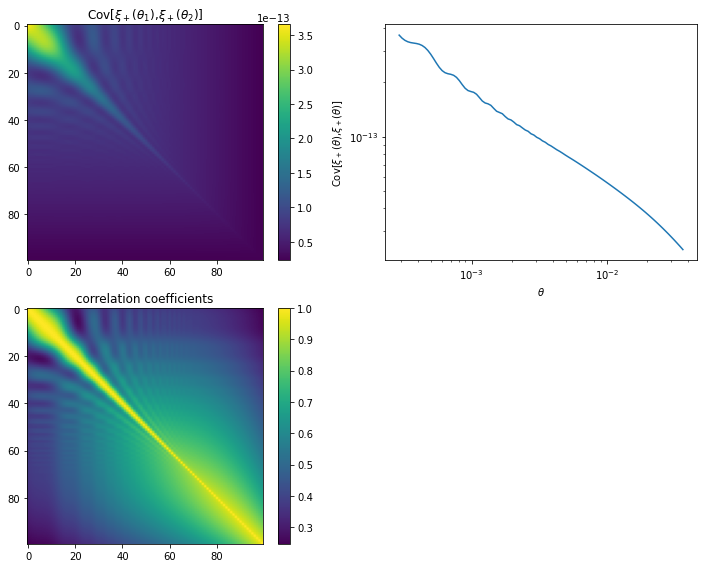

CPU times: user 59.9 s, sys: 523 ms, total: 1min
Wall time: 1min


In [112]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_bruteforce(['lowz','s12'], 'gamma_t', t, ['lowz','s12'], 'gamma_t', t, binave=True, plot=True)
cov = pk2cl.covariance_bruteforce(['s12','s12'], 'xi+', t, ['s12', 's12'], 'xi+', t, binave=True, plot=True)

In [106]:
t = np.logspace(0, 2.1, 30) * hsc3x2pt.arcmin2rad
ans = pk2cl.angular_correlation_function_fftlog('lowz', 's12', t, 'gamma_t')
cov = pk2cl.covariance_fftlog(['lowz','s12'], 'gamma_t', t, ['lowz', 's12'], 'gamma_t', t, binave=True, plot=False)

with hsc3x2pt.Time():
    covbf = pk2cl.covariance_bruteforce(['lowz', 's12'], 'gamma_t', t, ['lowz', 's12'], 'gamma_t', t, binave=True)

-5.536273882792816 0.5637261172071844
1000 1000
(1000, 1000)
1000 1000
0.1667389205271551 0.1667389205271551
0.1667389205271551 0.1667389205271551
:4.412276029586792 sec


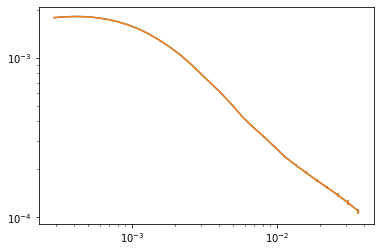

In [110]:
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.errorbar(t, ans , np.diag(cov)**0.5)
plt.errorbar(t, ans , np.diag(covbf)**0.5)
plt.show()

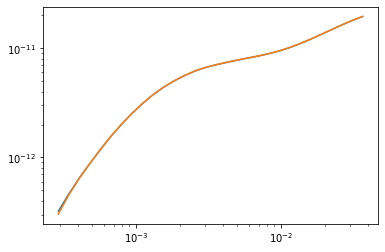

In [108]:
plt.figure()
plt.loglog(t, np.diag(cov))
plt.loglog(t, np.diag(covbf))
plt.show()

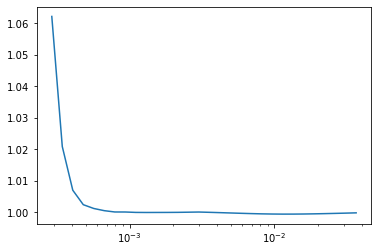

In [109]:
plt.figure()
plt.semilogx(t, np.diag(cov)/np.diag(covbf))
#plt.loglog(t, np.diag(covbf))
plt.show()

In [78]:
names1, probe1, names2, probe2 = ['l1','s1'], 'gamma_t', ['l1','s1'], 'gamma_t'
binave = True
dlnt1, dlnt2 = None, None
theta1, theta2 = t, t

l, Cl1 = pk2cl.get_lCl_from_cache(names1[0], names1[1], include_shot_noise=True)
l, Cl2 = pk2cl.get_lCl_from_cache(names2[0], names2[1], include_shot_noise=True)
Omega_s = 1 #########################################################################

if binave and dlnt1 is None:
    dlnt1 = np.log(theta1[1]/theta1[0])
if binave and dlnt2 is None:
    dlnt2 = np.log(theta2[1]/theta2[0])
if not binave:
    dlnt1, dlnt2 = 0, 0
print(dlnt1, dlnt2)

mu1 = pk2cl.probe_mu_dict[probe1]
mu2 = pk2cl.probe_mu_dict[probe2]

def helper(t1, t2):
    f = l**2*Cl1*Cl2/2.0/np.pi/Omega_s
    if binave:
        jj = hsc3x2pt.jn_binave(mu1, l, t1, t1*np.exp(dlnt1))*hsc3x2pt.jn_binave(mu2, l, t2, t2*np.exp(dlnt2))
    else:
        jj = hsc3x2pt.jn(mu1, l*t1)*jn(mu2, l*t2)
    ans = simps(f*jj, np.log(l))
    
    plt.figure()
    plt.loglog(l, f*jj)
    plt.show()
    
    return ans

0.07939948596531204 0.07939948596531204


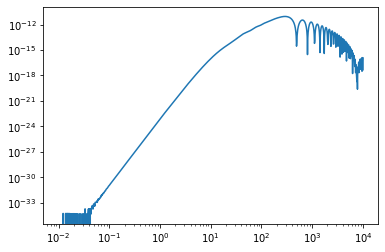

9.030005645335923e-12

In [81]:
helper(0.01, 0.01)